In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')


In [24]:
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')

In [25]:
df.head(3)

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,Boundaries - ZIP Codes
0,f79544cadbb5207914918ee33e4bbe15da85822ac04845...,NaN,NaN,08/26/2023 12:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,0.0,1.0,0.0,0,7,8,41.733090,-87.643681,POINT (-87.643680736622 41.733090380708),59.0
1,831b253cfc525bf9d518723e4f772d7d906310d4de257a...,NaN,NaN,08/25/2023 11:45:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,...,0.0,2.0,0.0,23,6,8,41.877012,-87.740605,POINT (-87.740605281946 41.87701210068),32.0
2,66ed9e835ec0d9a59c2ec4799f1d428a5288116378b45d...,NaN,NaN,08/25/2023 10:51:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,...,0.0,2.0,0.0,22,6,8,41.715221,-87.643105,POINT (-87.643105270846 41.715221236147),13.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754645 entries, 0 to 754644
Data columns (total 50 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                754645 non-null  object 
 1   RD_NO                          750132 non-null  object 
 2   CRASH_DATE_EST_I               56911 non-null   object 
 3   CRASH_DATE                     754645 non-null  object 
 4   POSTED_SPEED_LIMIT             754645 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         754645 non-null  object 
 6   DEVICE_CONDITION               754645 non-null  object 
 7   WEATHER_CONDITION              754645 non-null  object 
 8   LIGHTING_CONDITION             754645 non-null  object 
 9   FIRST_CRASH_TYPE               754645 non-null  object 
 10  TRAFFICWAY_TYPE                754645 non-null  object 
 11  LANE_CNT                       199004 non-null  float64
 12  ALIGNMENT                     

In [11]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

# Subset DataFrame to include only crashes from 2018, 2019, and 2020
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [10]:
crash_date_column = df['CRASH_DATE']


In [12]:
df['CRASH_YEAR'] = df['CRASH_DATE'].dt.year

In [13]:
crash_count_by_year = df['CRASH_YEAR'].value_counts().sort_index()

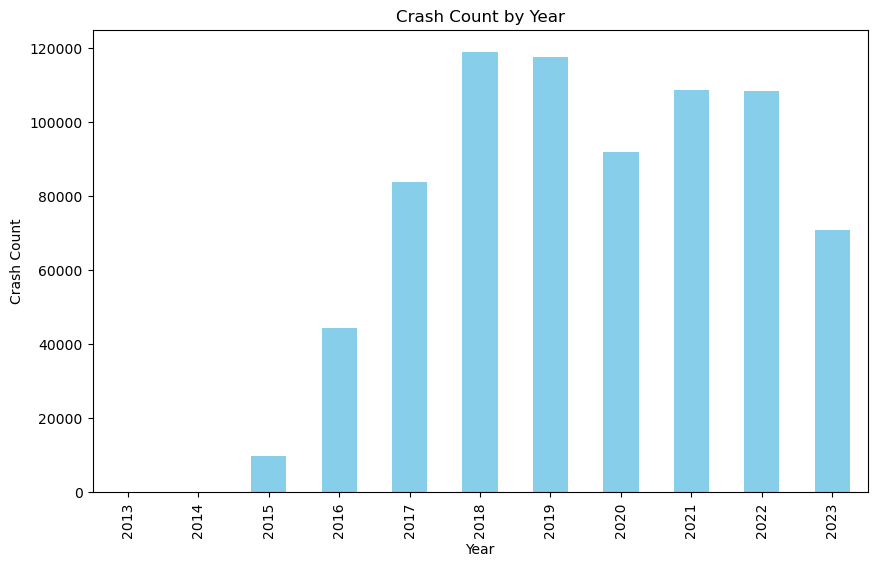

In [14]:
plt.figure(figsize=(10, 6))
crash_count_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Crash Count')
plt.title('Crash Count by Year')
plt.show()

In [15]:
df = df[(df['CRASH_DATE'] >= '2018-01-01') & (df['CRASH_DATE'] <= '2018-12-31')]


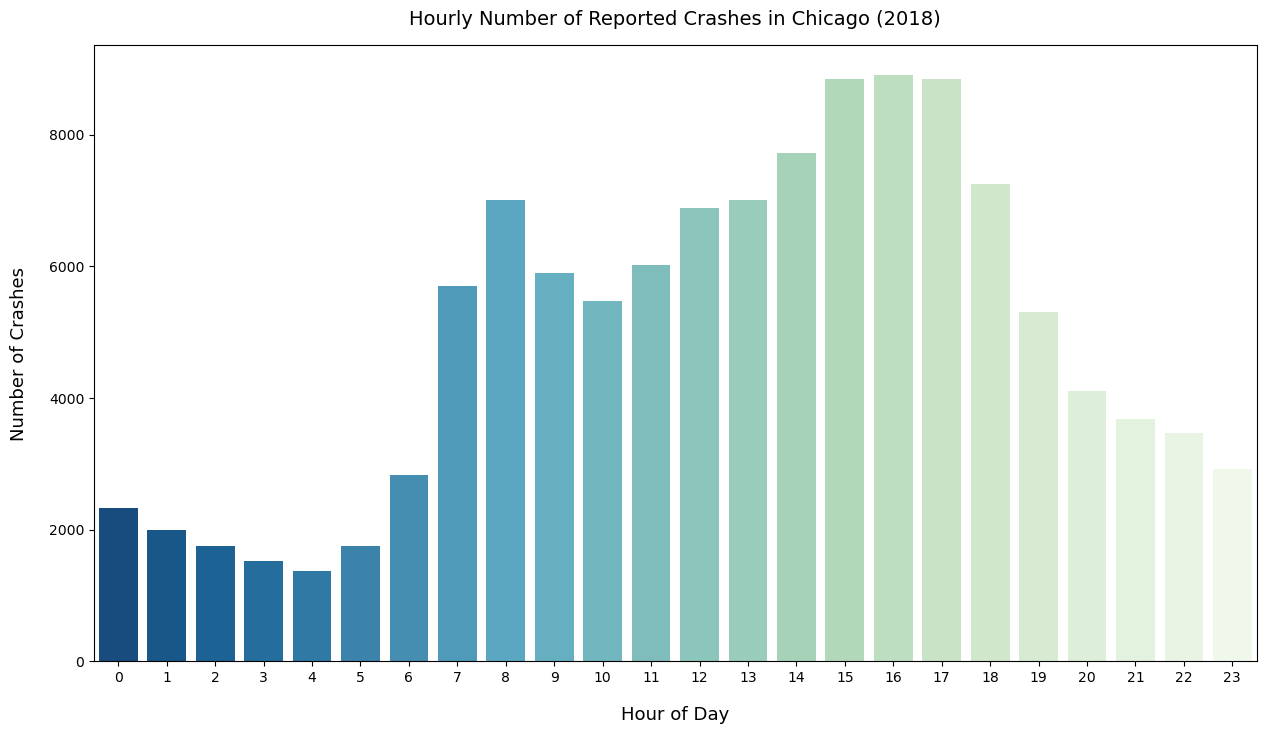

In [16]:
df = df.copy()  # Create a copy of the DataFrame

df['Hour'] = df['CRASH_DATE'].dt.hour

# Plot number of crashes by hour of day.
plt.figure(figsize=(15,8))
s = sns.barplot(data=df.groupby('Hour')['CRASH_RECORD_ID'].nunique().reset_index(), x='Hour', y='CRASH_RECORD_ID', palette='GnBu_r', linewidth=0)
s.set_title('Hourly Number of Reported Crashes in Chicago (2018)', y=1.02, fontsize=14)
s.set_xlabel('Hour of Day', fontsize=13, labelpad=15)
s.set_ylabel('Number of Crashes', fontsize=13, labelpad=15)
plt.show()

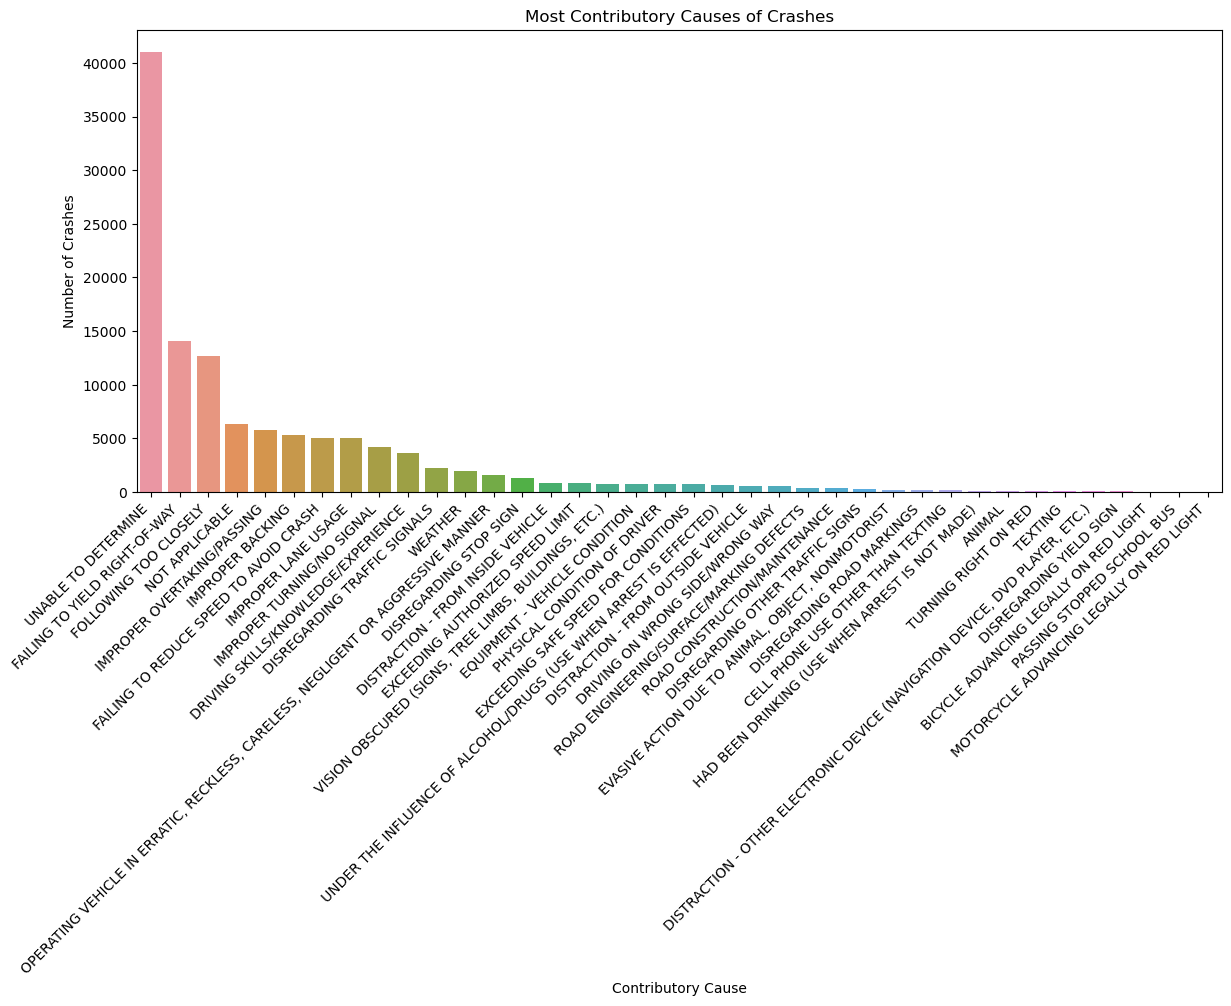

In [17]:
plt.figure(figsize=(14, 6))
sns.countplot(x='PRIM_CONTRIBUTORY_CAUSE', data=df, order=df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index)
plt.title('Most Contributory Causes of Crashes')
plt.xlabel('Contributory Cause')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.show()


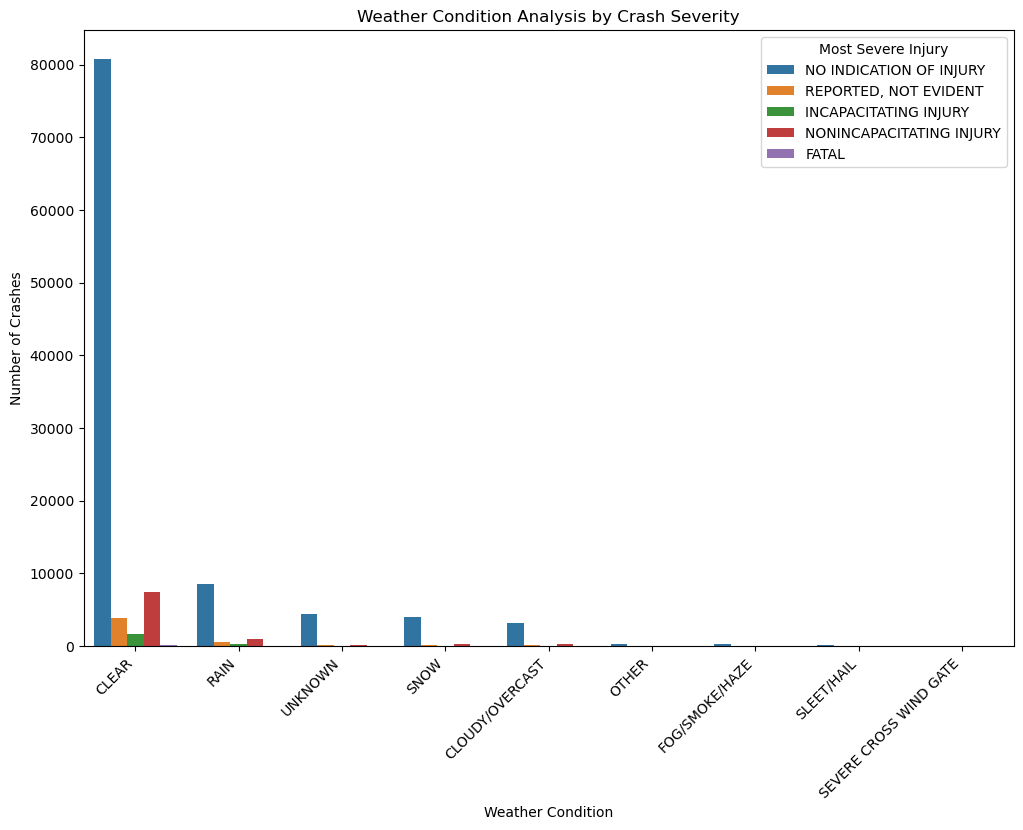

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(x='WEATHER_CONDITION', hue='MOST_SEVERE_INJURY', data=df, order=df['WEATHER_CONDITION'].value_counts().index)
plt.title('Weather Condition Analysis by Crash Severity')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Most Severe Injury')
plt.show()


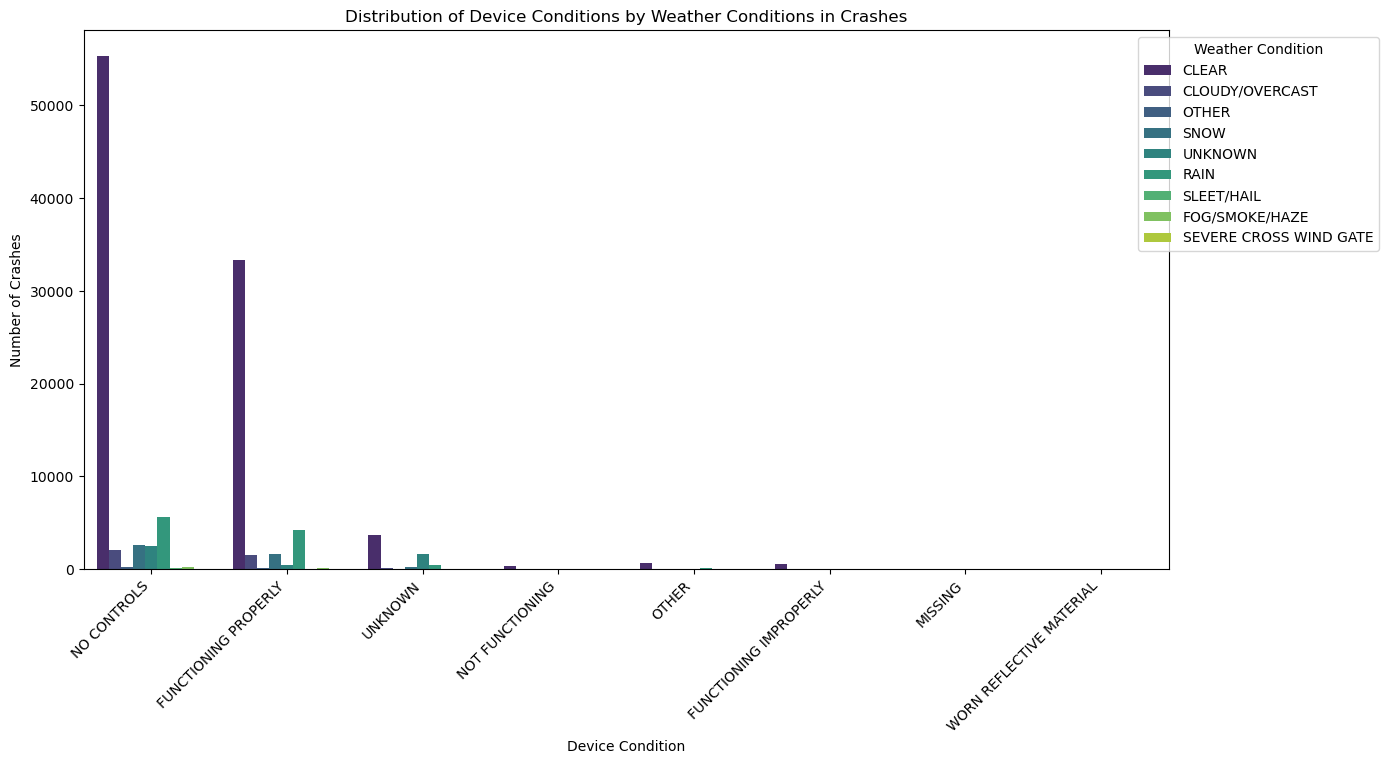

In [19]:
plt.figure(figsize=(14, 7))
sns.countplot(x='DEVICE_CONDITION', hue='WEATHER_CONDITION', data=df, palette='viridis')
plt.title('Distribution of Device Conditions by Weather Conditions in Crashes')
plt.xlabel('Device Condition')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Weather Condition', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

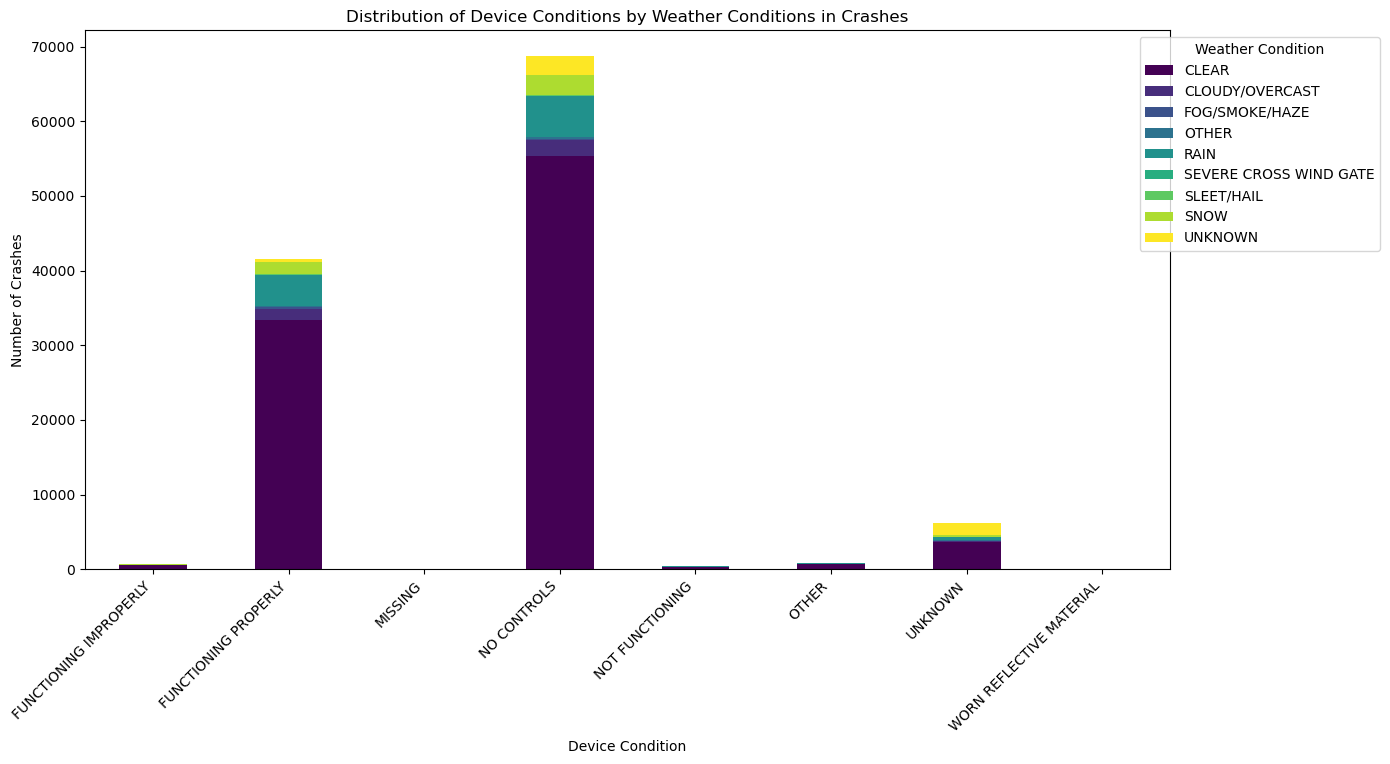

In [20]:
contingency_table = pd.crosstab(df['DEVICE_CONDITION'], df['WEATHER_CONDITION'])
contingency_table.plot(kind='bar', stacked=True, cmap='viridis', figsize=(14, 7))
plt.title('Distribution of Device Conditions by Weather Conditions in Crashes')
plt.xlabel('Device Condition')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Weather Condition', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


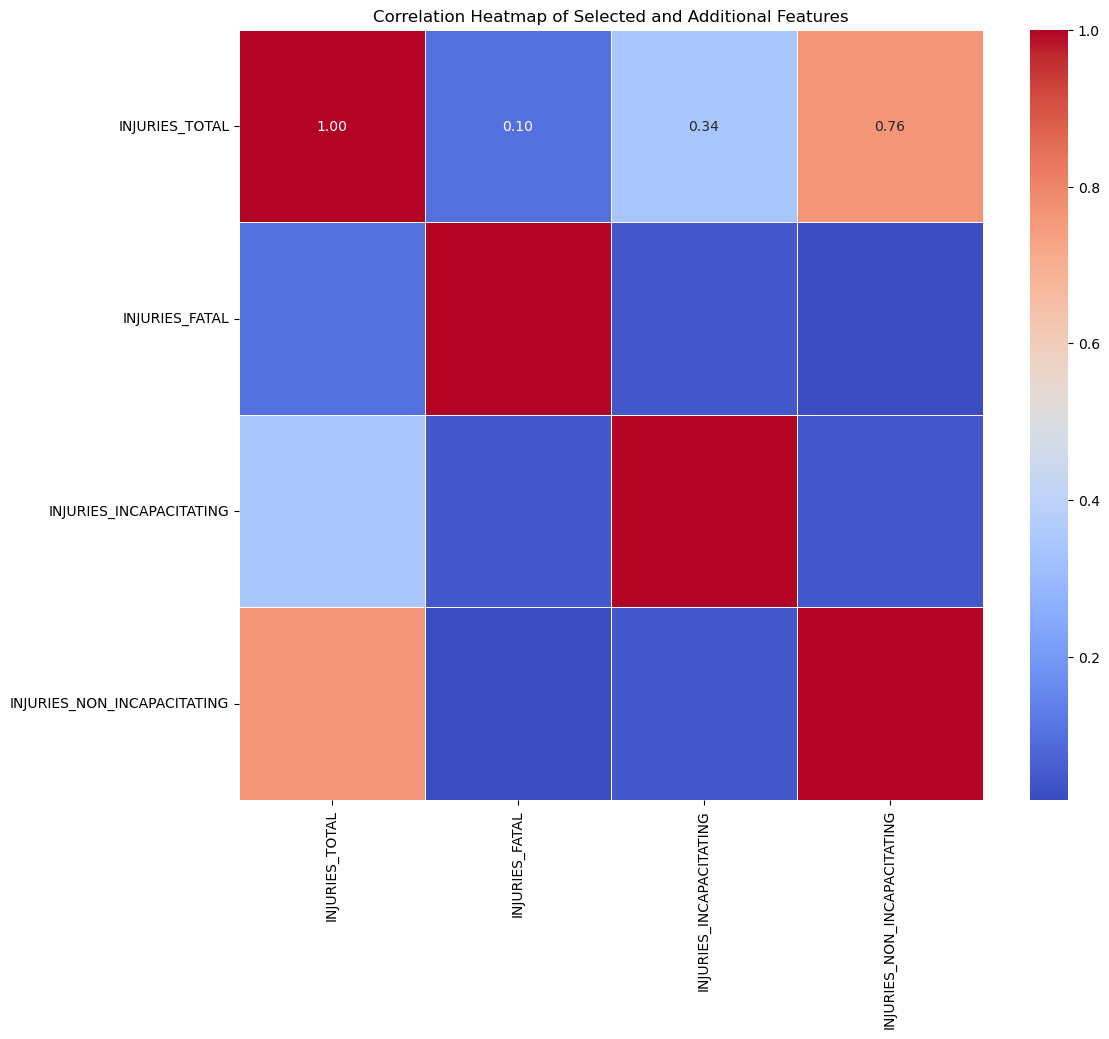

In [21]:
# Select additional features for correlation analysis
additional_features = ['INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING']

# Combine selected and additional features
all_features = additional_features

# Create a correlation matrix
correlation_matrix = df[all_features].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Selected and Additional Features')
plt.show()

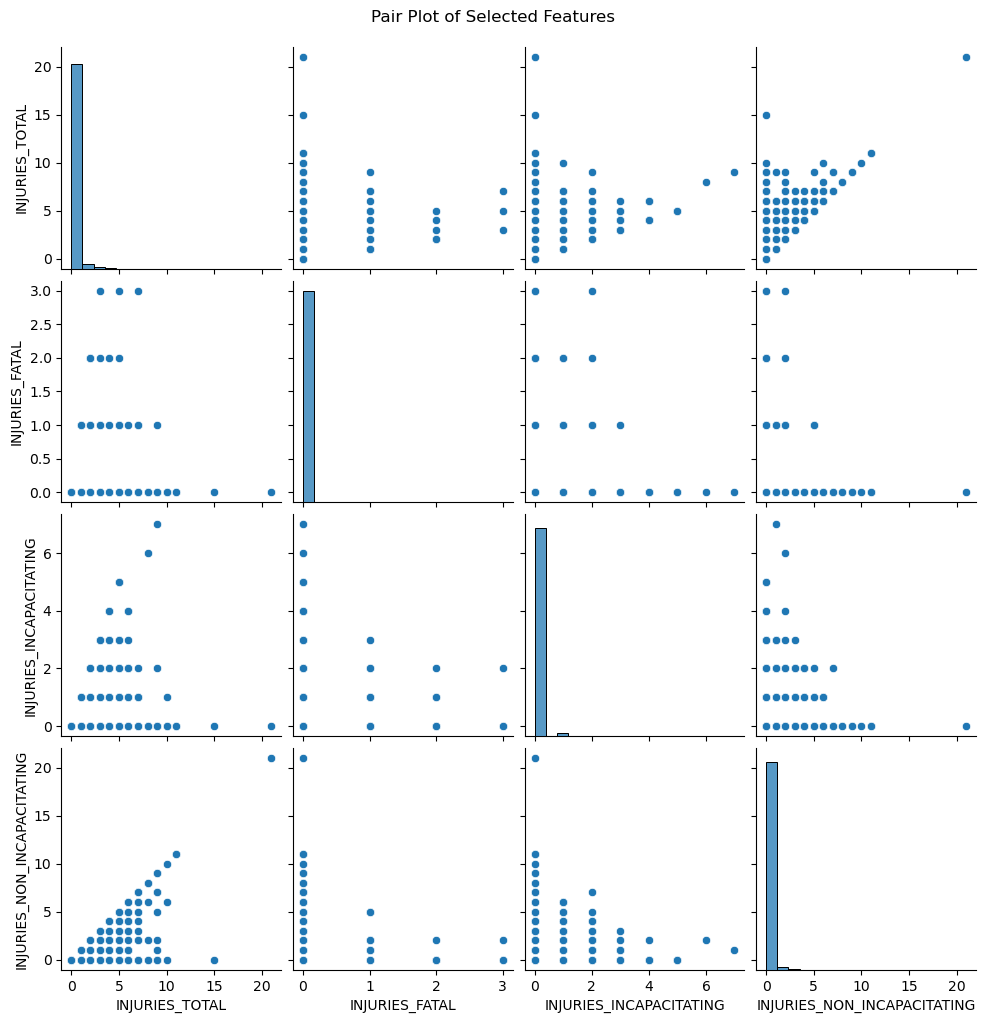

In [23]:
sns.pairplot(df[additional_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

C:\Users\sachi\AppData\Local\Temp\ipykernel_24756\2416301210.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='HIT_AND_RUN_I', data=df, palette=palette, alpha=0.7)


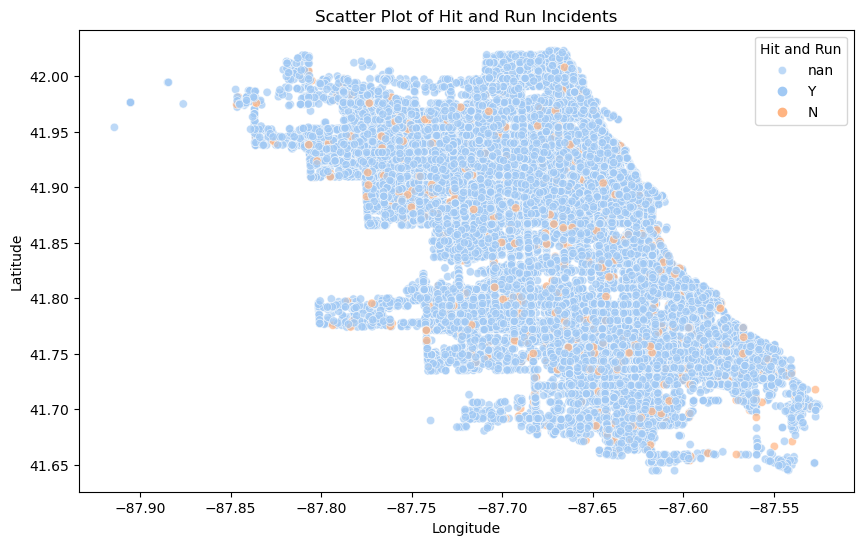

In [22]:
plt.figure(figsize=(10, 6))

# Automatically generate palette based on unique values in 'HIT_AND_RUN_I'
palette = sns.color_palette('pastel', as_cmap=True)
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='HIT_AND_RUN_I', data=df, palette=palette, alpha=0.7)

plt.title('Scatter Plot of Hit and Run Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Hit and Run', loc='upper right', labels=df['HIT_AND_RUN_I'].unique().astype(str))
plt.show()

In [ ]:
df.info()
